# Introducción a CuPy


## Importante: para ejecutar el código CuPy en Google Colab, debe habilitar un tiempo de ejecución de GPU

Runtime -> Change runtime type -> Select GPU

Es importante tener en cuenta que los resultados de las pruebas comparativas pueden variar según la asignación de hardware en Google Colab.

### ¿Qué es CuPy?

 - CuPy es una biblioteca de matrices de código abierto para **computación acelerada por GPU con Python**.
 - CuPy utiliza bibliotecas de **CUDA Toolkit**.
 - Es una biblioteca de arreglos **compatible con NumPy/SciPy**.

 ### ¿Por qué CuPy?

 - Usamos CuPy para **acelerar** nuestro código **Python**.
 - Incluso podríamos obtener **aceleraciones** de **hasta 100x**. (¡Así que podemos hacer un trabajo de 100 horas en 1 hora!)

 Nota: CuPy no reemplaza totalmente a NumPy porque como veremos no siempre es más rápido que NumPy, por ejemplo es más lento para matrices pequeñas.



### ¿Por qué es más rápido? (Computación paralela)

El código secuencial se ejecuta en un solo hilo.

![serie](https://drive.google.com/uc?export=view&id=18fHjorM-y2bojxEysF81MBLlWxcjCRlF)


El código paralelo se ejecuta en varios subprocesos.

![paralelo](https://drive.google.com/uc?export=view&id=10yQ9A6XH44wRmqhyIsunOw4FZuUjfaI0)


La arquitectura de una CPU y una GPU se ve así:

![CPUvsGPU](https://drive.google.com/uc?export=view&id=1ETznPWsEdJJHbJBjNz8B09X7Gdhgh9-2)


### ¿Cómo usar CuPy?

 - En muchas situaciones, CuPy se usa de la misma forma que usamos NumPy.
 - Podemos usar arreglos CuPy de la misma manera que usamos arreglos NumPy.
 - Las matrices CuPy son **compatibles** con las matrices NumPy.

### Notas de instalación

Una forma muy fácil de instalar CuPy es usando Anaconda (o miniconda).

Solo tenemos que ejecutar el siguiente comando en una terminal Linux (debemos tener instalado Anaconda):

`conda install -c conda-forge cupy`

En Windows, podemos usar Anaconda Prompt para ejecutar el mismo comando.

También podemos instalar CuPy usando `pip`. Sin embargo, en este caso no es tan fácil como usar Anaconda, porque debemos instalar la versión correcta de CUDA Toolkit por separado. Anaconda hace esto por nosotros.

En cualquier caso, pueden encontrar las instrucciones oficiales de instalación [aquí](https://docs.cupy.dev/en/stable/install.html).

### Comprobación de la GPU

Antes de comenzar, verifiquemos si tenemos una GPU disponible. Si no tenemos una GPU, no podemos usar CuPy.

Podemos comprobar si tenemos una GPU disponible ejecutando el siguiente código:

`!nvidia-smi`

In [ ]:
!nvidia-smi

Mon Aug 14 19:15:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importando CuPy

 - CuPy es un paquete de Python, por lo que podemos importarlo como cualquier otro paquete.
 - Por lo general, importamos CuPy como `cp` de la misma manera que importamos NumPy como `np`.


Importemos CuPy y NumPy.

In [ ]:
import cupy as cp
import numpy as np

### Primeros pasos

La idea principal de CuPy es usar las mismas funciones que NumPy, pero con el prefijo `cp`. Entonces, la mayoría de las veces, podemos simplemente reemplazar `np` con `cp` y estamos listos para comenzar. (Sencillo, ¿verdad?)

Comencemos con un ejemplo simple. Crearemos una matriz NumPy y una matriz CuPy y haremos algunas operaciones básicas con ellas.

#### Nota acerca del uso de la memoria

Es muy importante mencionar lo siguiente:

Los arreglos CuPy se almacenan en **memoria GPU** (**dispositivo**). Las matrices NumPy se almacenan en la **memoria RAM** (**host**).

Por lo tanto, muchas bibliotecas que funcionan con arreglos NumPy no funcionarán de inmediato con arreglos CuPy. Por ejemplo, si intentamos usar `matplotlib` para trazar una matriz CuPy, obtendremos un error. Para poder usar matrices CuPy con otras bibliotecas, tenemos que **transferirlas** a la memoria del **host**. Podemos hacer esto usando los métodos `get()` o `asnumpy()`. Probablemente necesitará hacer esto con bastante frecuencia, pero en realidad no es una gran idea porque es muy lento. Por lo tanto, trate de evitarlo tanto como sea posible. La mejor práctica es usar arreglos CuPy tanto como sea posible y solo transferirlos a la memoria del host cuando realmente lo necesite.

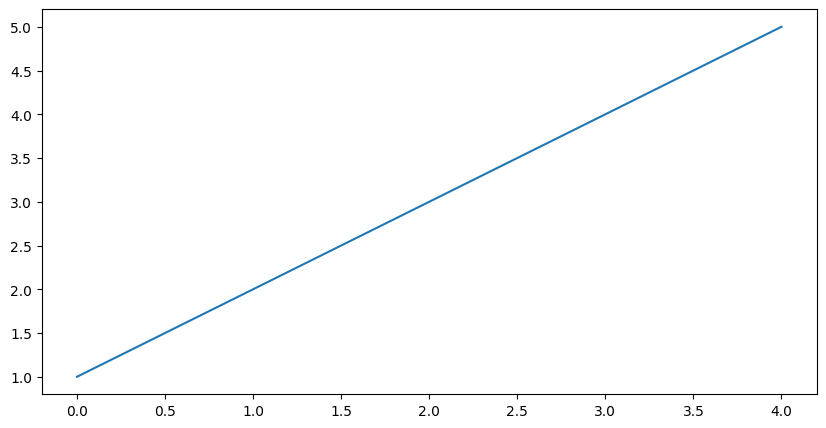

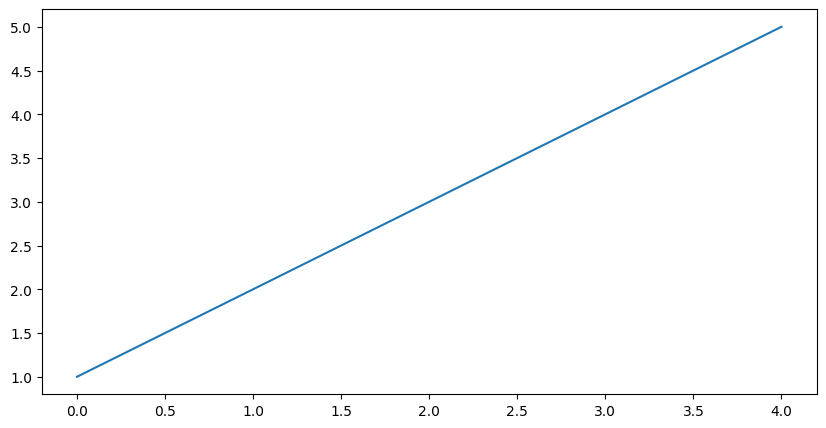

In [ ]:
# Create a NumPy array
x = np.array([1, 2, 3, 4, 5])

# Create a CuPy array
y = cp.array([1, 2, 3, 4, 5])

# Convert a CuPy array to a NumPy array
z = y.get()
#z = cp.asnumpy(y)

# Convert a NumPy array to a CuPy array
w = cp.asarray(x)


#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(x)

#This will not work
#plt.figure(figsize=(10, 5))
#plt.plot(y)

#This will work
plt.figure(figsize=(10, 5))
plt.plot(y.get())

plt.show()


#### Comparación de rendimiento en un ejemplo muy simple

Hagamos algunas operaciones básicas con nuestras matrices. Compararemos el rendimiento de la siguiente operación:

$$a*b + 2c$$

donde $a$, $b$ y $c$ son vectores de tamaño $n$ y $*$ es la multiplicación por elementos (es decir, la salida es un vector de tamaño $n$ donde cada elemento es el producto de los elementos de $a$ y $b$) correspondientes.

In [ ]:
#Vector size
n = 2**25 # 33.5 million float64 elements - 2^25 * 2^3 bytes = 2^28 bytes = 2^8 MB = 256 MB

#Create random NumPy arrays of size n
a = np.random.rand(n)
b = np.random.rand(n)
c = np.random.rand(n)

#Create random CuPy arrays of size n
a_gpu = cp.random.rand(n)
b_gpu = cp.random.rand(n)
c_gpu = cp.random.rand(n)

#Perform the vector addition on the CPU
%timeit a*b + 2*c

#Perform the vector addition on the GPU
%timeit a_gpu*b_gpu + 2*c_gpu

222 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.48 ms ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Obtenemos una aceleración de alrededor de **~26x**. Teniendo en cuenta que solo reemplazamos `np` con `cp`, este es un gran resultado, incluso para un ejemplo simple. Al usar operaciones más complejas, podemos obtener mayores aceleraciones.

#### Tamaño de la Matriz

Comparemos la misma operación en diferentes tamaños de matriz.

In [ ]:
#Array of sizes
n = [2**i for i in range(10, 27)]

#Create random NumPy arrays of size n
a = [np.random.rand(i) for i in n]
b = [np.random.rand(i) for i in n]
c = [np.random.rand(i) for i in n]

#Create random CuPy arrays of size n
a_gpu = [cp.random.rand(i) for i in n]
b_gpu = [cp.random.rand(i) for i in n]
c_gpu = [cp.random.rand(i) for i in n]

#Store the time taken for each vector addition on the CPU
print("CPU")
cpu_time = []
for i in range(len(n)):
    t = %timeit -o a[i]*b[i] + 2*c[i]
    cpu_time.append(t.average)

#Store the time taken for each vector addition on the GPU
print("GPU")
gpu_time = []
for i in range(len(n)):
    t = %timeit -o a_gpu[i]*b_gpu[i] + 2*c_gpu[i]
    gpu_time.append(t.average)


CPU
6.51 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.96 µs ± 79.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.14 µs ± 1.6 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.1 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
20.6 µs ± 428 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
49.9 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
134 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
281 µs ± 8.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
623 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.6 ms ± 24.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.85 ms ± 27.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.7 ms ± 760 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.8 ms ± 632 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
55 ms ± 518 µs per loop (mean ± std. dev. of 7 runs

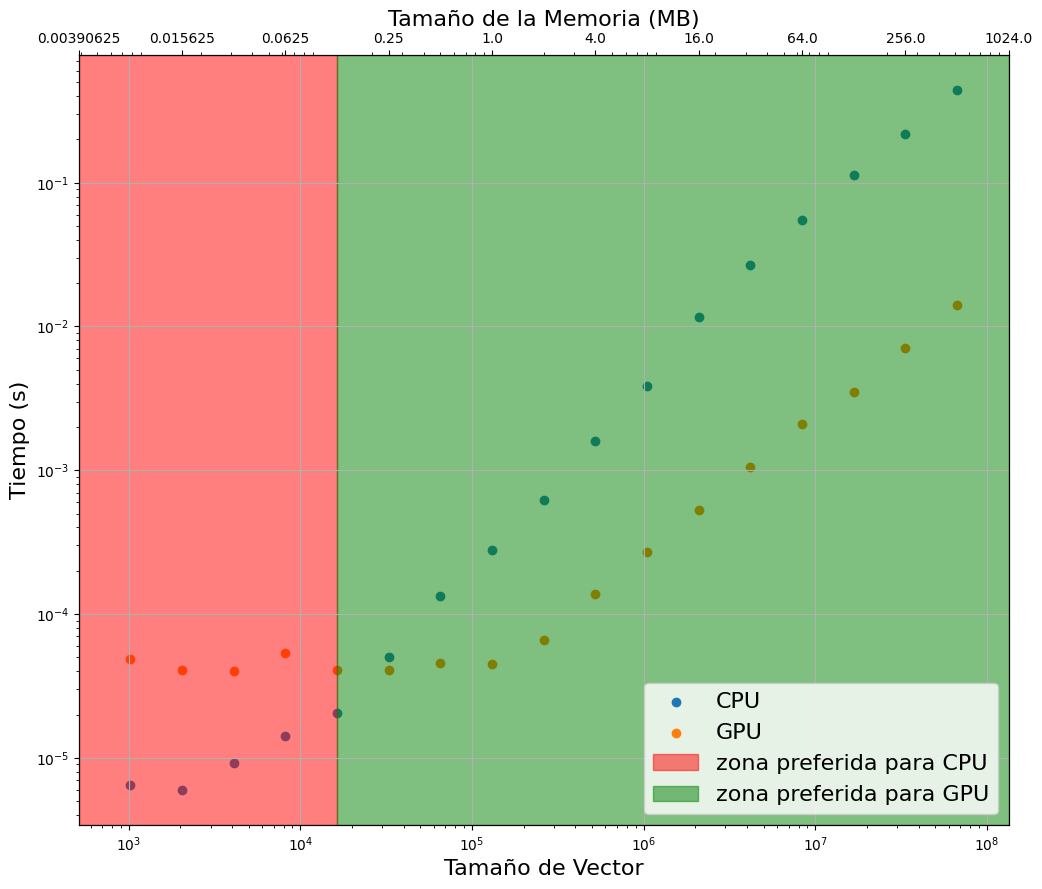

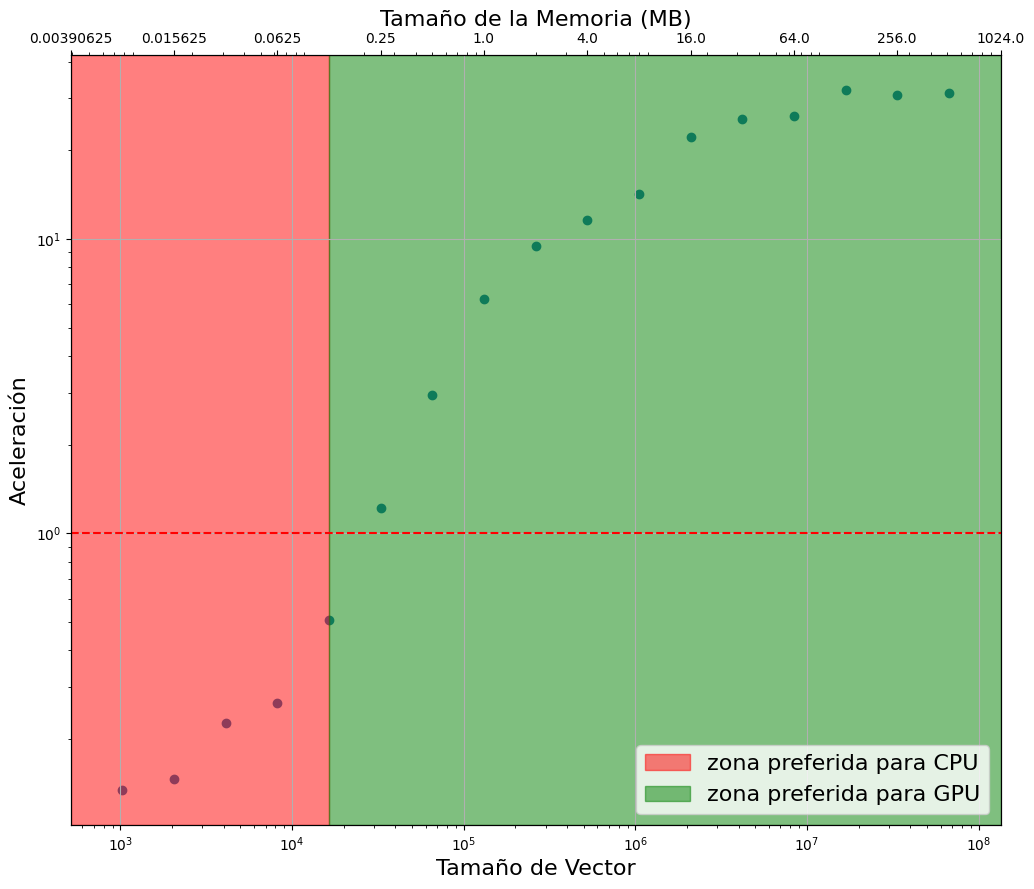

In [ ]:
#Plot the time taken for each vector addition on the CPU and GPU
n = [2**i for i in range(10, 27)]
plt.figure(figsize=(12, 10))
plt.scatter(n, cpu_time, label='CPU')
plt.scatter(n, gpu_time, label='GPU')
plt.xlabel('Tamaño de Vector', fontsize=16)
plt.ylabel('Tiempo (s)', fontsize=16)
plt.axvspan(2**9, 2**14, alpha=0.5, color='red', label='zona preferida para CPU')
plt.axvspan(2**14, 2**27, alpha=0.5, color='green', label='zona preferida para GPU')
plt.xlim(2**9, 2**27)
plt.legend(fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.grid()

n2 = [2**i for i in range(9, 28)]
n_MB = [i*8/1024**2 for i in n2]
ax2 = plt.gca().twiny()
ax2.set_xscale('log')
ax2.set_xticks(n_MB[::2])
ax2.set_xticklabels(n_MB[::2])
ax2.set_xlabel('Tamaño de la Memoria (MB)', fontsize=16)

#Plot the speedup of the GPU over the CPU
plt.figure(figsize=(12, 10))
plt.scatter(n, np.array(cpu_time)/np.array(gpu_time))
plt.xlabel('Tamaño de Vector', fontsize=16)
plt.ylabel('Aceleración', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.axhline(y=1, color='r', linestyle='--')
plt.axvspan(2**9, 2**14, alpha=0.5, color='red', label='zona preferida para CPU')
plt.axvspan(2**14, 2**27, alpha=0.5, color='green', label='zona preferida para GPU')
plt.xlim(2**9, 2**27)
plt.legend(fontsize=16)
plt.grid()

ax2 = plt.gca().twiny()
ax2.set_xscale('log')
ax2.set_xticks(n_MB[::2])
ax2.set_xticklabels(n_MB[::2])
ax2.set_xlabel('Tamaño de la Memoria (MB)', fontsize=16)


plt.show()


A partir de estos resultados vemos la enorme importancia del tamaño de las matrices. Si tenemos arreglos pequeños (de menos de 100 kB), usar la GPU no será beneficiosa, e incluso será más lenta que la CPU. Esto se debe a que los procesadores GPU son más lentos que los procesadores CPU. Pueden superar a la CPU solo cuando tenemos arreglos grandes, porque cuanto más grande es el arreglo, más operaciones podemos hacer en paralelo.

Otra cosa importante a tener en cuenta en la curva de rendimiento del tiempo de GPU es que el tiempo de GPU es casi constante para arreglos de menos de 1 MB. Esto se debe a que todas las GPU tienen una cantidad máxima de operaciones que pueden realizar en paralelo. Esto se denomina **ocupación máxima**. Entonces, cuando hacemos operaciones en matrices de tamaño por debajo de este umbral, la GPU se infrautilizará. El tiempo necesario para realizar las operaciones será casi constante porque la GPU podrá realizar todas las operaciones en paralelo, el tiempo necesario estará determinado por el tiempo que se tarde en realizar una sola operación.

#Solución de Reacción-Difusión en dos dimensiones vista en la clase

Sistema de dos componentes ($u$ y $v$) dado por:

$$
\begin{align*}
\frac{\partial u}{\partial t} & = D_u \nabla^2 u + g_1(u, v)\\
\frac{\partial v}{\partial t} & = D_v \nabla^2 v + g_2(u, v)
\end{align*}
$$
donde $u$ y $v$ son las concentraciones de dos morfógenos (sustancias) que interactúan entre sí.
Los términos $g_1(u, v)$ y $g_2(u, v)$ son las funciones de reacción que describen cómo las dos sustancias interactúan entre sí.

Como vimos en clase vamos a usar :
$$
\begin{align*}
g_1(u, v) &= u - u^3 - v + a\\
g_2(u, v) &= b(u - v)
\end{align*}
$$
donde $a$ y $b$ son parámetros constantes del sistema.

# Ejemplo visto en clase usando NumPy

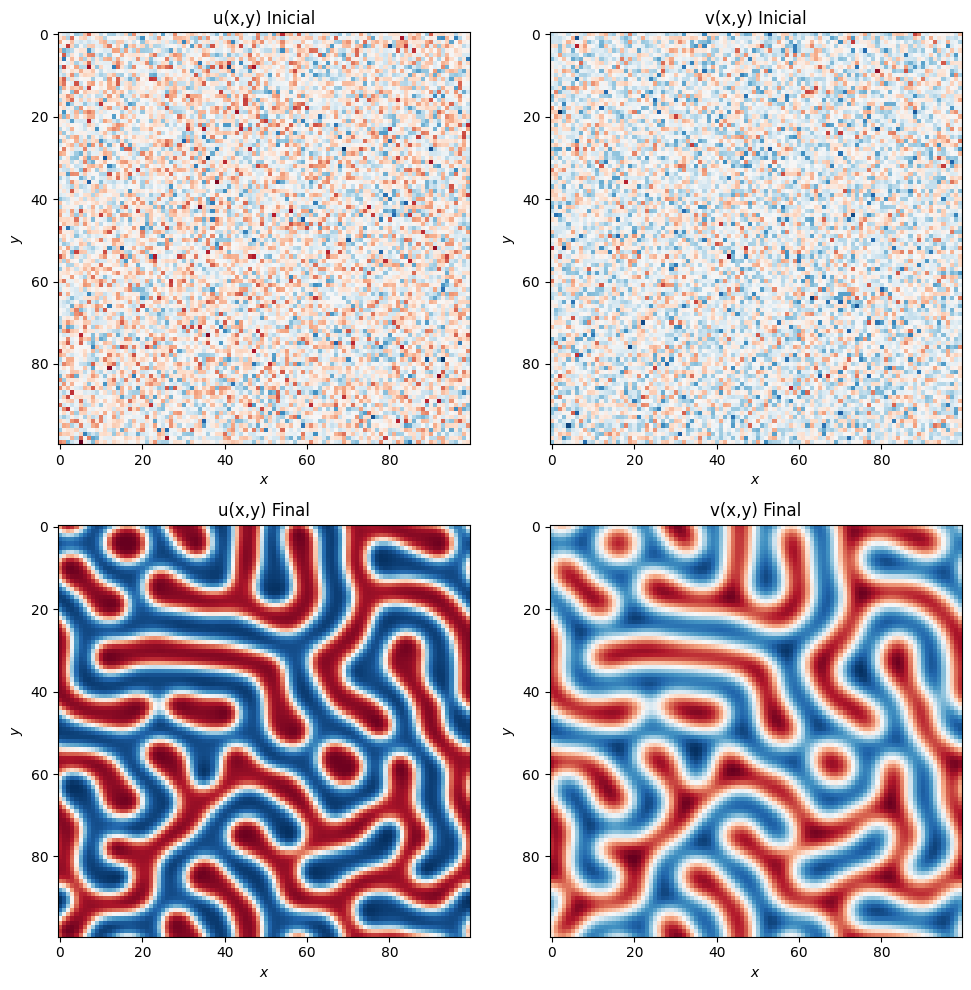


 Tiempo de corrida en segundos:  71.54466724395752


In [ ]:
#@title NumPy Arreglo de 100x100

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

start = time.time()
# Parámetros
Du, Dv = 1.0, 100
a, b = 0.005, 10
dx = 1.0  # Discretización espacial
dt = 0.001  # Paso del tiempo
L = 100  # longitud del dominio
T = 100  # tiempo total

Nx = int(L/dx)  # número de puntos en el espacio
Nt = int(T/dt)  # número de puntos en el tiempo

# Inicializa u y v
u = np.random.normal(scale=0.1, size=(Nx, Nx))
v = np.random.normal(scale=0.1, size=(Nx, Nx))

# Definimos g1 y g2
def g1(u, v):
    return u - u**3 - v + a

def g2(u, v):
    return b*(u - v)

# Función Laplaciano 2D centrado usando condiciones periódicas
def laplaciano2D(Z):
    Zarriba = np.roll(Z, 1, axis=0)
    Zizquierda = np.roll(Z, 1, axis=1)
    Zabajo = np.roll(Z, -1, axis=0)
    Zderecha = np.roll(Z, -1, axis=1)
    return (Zarriba + Zizquierda + Zabajo + Zderecha - 4*Z) / dx**2

# Preparar la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Configuración inicial u
axs[0, 0].imshow(u, cmap='RdBu', interpolation='nearest')
axs[0, 0].set_title('u(x,y) Inicial')
axs[0, 0].set_xlabel("$x$")
axs[0, 0].set_ylabel("$y$")

# Configuración inicial v
axs[0, 1].imshow(v, cmap='RdBu', interpolation='nearest')
axs[0, 1].set_title('v(x,y) Inicial')
axs[0, 1].set_xlabel("$x$")
axs[0, 1].set_ylabel("$y$")

# Calcular configuración final
for _ in range(Nt):
    laplaciano_u = laplaciano2D(u)
    laplaciano_v = laplaciano2D(v)
    u += dt * (Du * laplaciano_u + g1(u, v))
    v += dt * (Dv * laplaciano_v + g2(u, v))

# Configuración final u
axs[1, 0].imshow(u, cmap='RdBu', interpolation='nearest')
axs[1, 0].set_title('u(x,y) Final')
axs[1, 0].set_xlabel("$x$")
axs[1, 0].set_ylabel("$y$")

# Configuración final v
axs[1, 1].imshow(v, cmap='RdBu', interpolation='nearest')
axs[1, 1].set_title('v(x,y) Final')
axs[1, 1].set_xlabel("$x$")
axs[1, 1].set_ylabel("$y$")

plt.tight_layout()
plt.show()

end = time.time()
print("\n Tiempo de corrida en segundos: ", end - start)


In [1]:
#@title NumPy Arreglo de 500x500

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

start = time.time()
# Parámetros
Du, Dv = 1.0, 100
a, b = 0.005, 10
dx = 1.0  # Discretización espacial
dt = 0.001  # Paso del tiempo
L = 500  # longitud del dominio
T = 100  # tiempo total

Nx = int(L/dx)  # número de puntos en el espacio
Nt = int(T/dt)  # número de puntos en el tiempo

# Inicializa u y v
u = np.random.normal(scale=0.1, size=(Nx, Nx))
v = np.random.normal(scale=0.1, size=(Nx, Nx))

# Definimos g1 y g2
def g1(u, v):
    return u - u**3 - v + a

def g2(u, v):
    return b*(u - v)

# Función Laplaciano 2D centrado usando condiciones periódicas
def laplaciano2D(Z):
    Zarriba = np.roll(Z, 1, axis=0)
    Zizquierda = np.roll(Z, 1, axis=1)
    Zabajo = np.roll(Z, -1, axis=0)
    Zderecha = np.roll(Z, -1, axis=1)
    return (Zarriba + Zizquierda + Zabajo + Zderecha - 4*Z) / dx**2

# Preparar la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Configuración inicial u
axs[0, 0].imshow(u, cmap='RdBu', interpolation='nearest')
axs[0, 0].set_title('u(x,y) Inicial')
axs[0, 0].set_xlabel("$x$")
axs[0, 0].set_ylabel("$y$")

# Configuración inicial v
axs[0, 1].imshow(v, cmap='RdBu', interpolation='nearest')
axs[0, 1].set_title('v(x,y) Inicial')
axs[0, 1].set_xlabel("$x$")
axs[0, 1].set_ylabel("$y$")

# Calcular configuración final
for _ in range(Nt):
    laplaciano_u = laplaciano2D(u)
    laplaciano_v = laplaciano2D(v)
    u += dt * (Du * laplaciano_u + g1(u, v))
    v += dt * (Dv * laplaciano_v + g2(u, v))

# Configuración final u
axs[1, 0].imshow(u, cmap='RdBu', interpolation='nearest')
axs[1, 0].set_title('u(x,y) Final')
axs[1, 0].set_xlabel("$x$")
axs[1, 0].set_ylabel("$y$")

# Configuración final v
axs[1, 1].imshow(v, cmap='RdBu', interpolation='nearest')
axs[1, 1].set_title('v(x,y) Final')
axs[1, 1].set_xlabel("$x$")
axs[1, 1].set_ylabel("$y$")

plt.tight_layout()
plt.show()

end = time.time()
print("\n Tiempo de corrida en segundos: ", end - start)


Output hidden; open in https://colab.research.google.com to view.

# Resolución de las ecuaciones de Reacción-Difusión usando la librería CuPy

Vamos a hacer lo más simple que podemos hacer, o sea, solamente reemplazamos np con cp en el código de arriba:

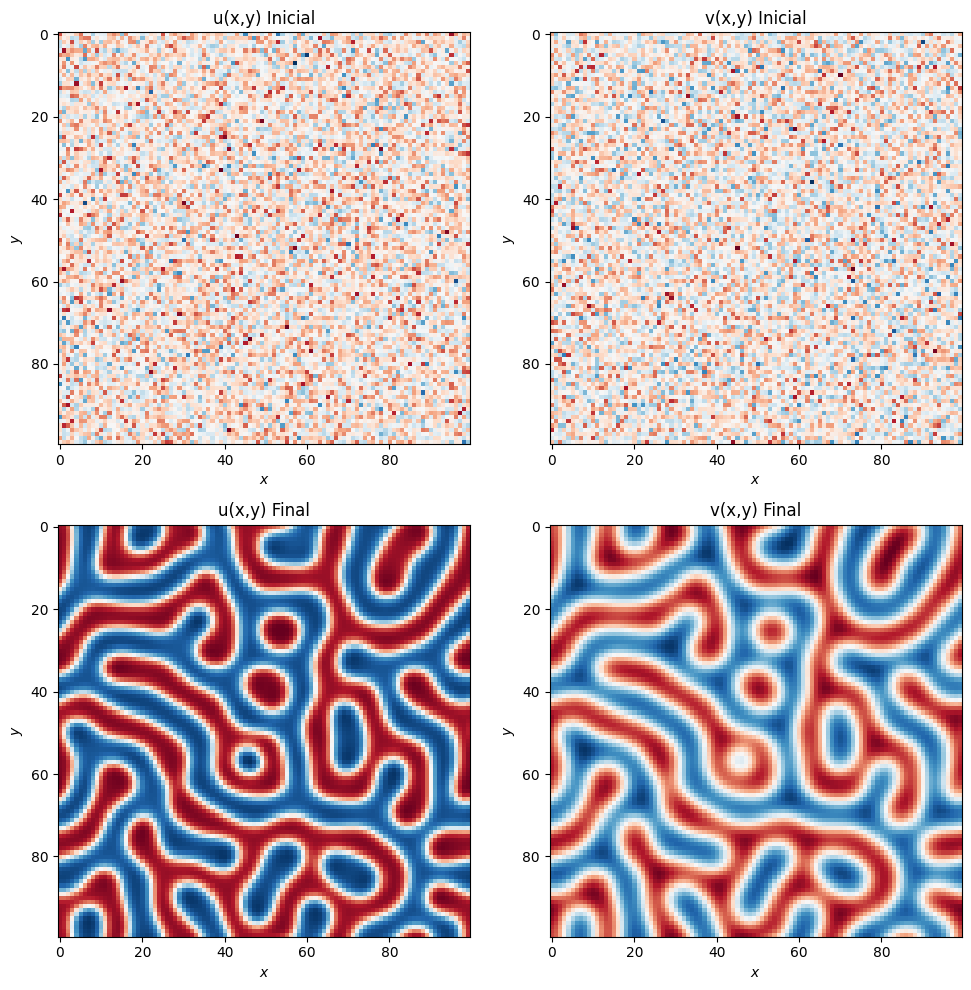


 Tiempo de corrida en segundos:  133.87287020683289


In [ ]:
#@title CuPy Arreglo de 100x100

import cupy as cp
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

start = time.time()
# Parámetros
Du, Dv = 1.0, 100
a, b = 0.005, 10
dx = 1.0  # Discretización espacial
dt = 0.001  # Paso del tiempo
L = 100  # longitud del dominio
T = 100  # tiempo total

Nx = int(L/dx)  # número de puntos en el espacio
Nt = int(T/dt)  # número de puntos en el tiempo

# Inicializa u y v con CuPy arrays
u = cp.random.normal(scale=0.1, size=(Nx, Nx))
v = cp.random.normal(scale=0.1, size=(Nx, Nx))

# Definimos g1 y g2
def g1(u, v):
    return u - u**3 - v + a

def g2(u, v):
    return b*(u - v)

# Función Laplaciano 2D centrado usando condiciones periódicas
def laplaciano2D(Z):
    Zarriba = cp.roll(Z, 1, axis=0)
    Zizquierda = cp.roll(Z, 1, axis=1)
    Zabajo = cp.roll(Z, -1, axis=0)
    Zderecha = cp.roll(Z, -1, axis=1)
    return (Zarriba + Zizquierda + Zabajo + Zderecha - 4*Z) / dx**2

# Preparar la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Configuración inicial u
axs[0, 0].imshow(u.get(), cmap='RdBu', interpolation='nearest')
axs[0, 0].set_title('u(x,y) Inicial')
axs[0, 0].set_xlabel("$x$")
axs[0, 0].set_ylabel("$y$")

# Configuración inicial v
axs[0, 1].imshow(v.get(), cmap='RdBu', interpolation='nearest')
axs[0, 1].set_title('v(x,y) Inicial')
axs[0, 1].set_xlabel("$x$")
axs[0, 1].set_ylabel("$y$")

# Calcular configuración final
for _ in range(Nt):
    laplaciano_u = laplaciano2D(u)
    laplaciano_v = laplaciano2D(v)
    u += dt * (Du * laplaciano_u + g1(u, v))
    v += dt * (Dv * laplaciano_v + g2(u, v))

# Configuración final u
axs[1, 0].imshow(u.get(), cmap='RdBu', interpolation='nearest')
axs[1, 0].set_title('u(x,y) Final')
axs[1, 0].set_xlabel("$x$")
axs[1, 0].set_ylabel("$y$")

# Configuración final v
axs[1, 1].imshow(v.get(), cmap='RdBu', interpolation='nearest')
axs[1, 1].set_title('v(x,y) Final')
axs[1, 1].set_xlabel("$x$")
axs[1, 1].set_ylabel("$y$")

plt.tight_layout()
plt.show()

end = time.time()
print("\n Tiempo de corrida en segundos: ", end - start)

In [ ]:
#@title CuPy Arreglo de 500x500

import cupy as cp
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

start = time.time()
# Parámetros
Du, Dv = 1.0, 100
a, b = 0.005, 10
dx = 1.0  # Discretización espacial
dt = 0.001  # Paso del tiempo
L = 500  # longitud del dominio
T = 100  # tiempo total

Nx = int(L/dx)  # número de puntos en el espacio
Nt = int(T/dt)  # número de puntos en el tiempo

# Inicializa u y v con CuPy arrays
u = cp.random.normal(scale=0.1, size=(Nx, Nx))
v = cp.random.normal(scale=0.1, size=(Nx, Nx))

# Definimos g1 y g2
def g1(u, v):
    return u - u**3 - v + a

def g2(u, v):
    return b*(u - v)

# Función Laplaciano 2D centrado usando condiciones periódicas
def laplaciano2D(Z):
    Zarriba = cp.roll(Z, 1, axis=0)
    Zizquierda = cp.roll(Z, 1, axis=1)
    Zabajo = cp.roll(Z, -1, axis=0)
    Zderecha = cp.roll(Z, -1, axis=1)
    return (Zarriba + Zizquierda + Zabajo + Zderecha - 4*Z) / dx**2

# Preparar la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Configuración inicial u
axs[0, 0].imshow(u.get(), cmap='RdBu', interpolation='nearest')
axs[0, 0].set_title('u(x,y) Inicial')
axs[0, 0].set_xlabel("$x$")
axs[0, 0].set_ylabel("$y$")

# Configuración inicial v
axs[0, 1].imshow(v.get(), cmap='RdBu', interpolation='nearest')
axs[0, 1].set_title('v(x,y) Inicial')
axs[0, 1].set_xlabel("$x$")
axs[0, 1].set_ylabel("$y$")

# Calcular configuración final
for _ in range(Nt):
    laplaciano_u = laplaciano2D(u)
    laplaciano_v = laplaciano2D(v)
    u += dt * (Du * laplaciano_u + g1(u, v))
    v += dt * (Dv * laplaciano_v + g2(u, v))

# Configuración final u
axs[1, 0].imshow(u.get(), cmap='RdBu', interpolation='nearest')
axs[1, 0].set_title('u(x,y) Final')
axs[1, 0].set_xlabel("$x$")
axs[1, 0].set_ylabel("$y$")

# Configuración final v
axs[1, 1].imshow(v.get(), cmap='RdBu', interpolation='nearest')
axs[1, 1].set_title('v(x,y) Final')
axs[1, 1].set_xlabel("$x$")
axs[1, 1].set_ylabel("$y$")

plt.tight_layout()
plt.show()

end = time.time()
print("\n Tiempo de corrida en segundos: ", end - start)

Output hidden; open in https://colab.research.google.com to view.

Para un tamaño de 500x500 tenemos una mejoría de **16x** en el tiempo de ejecución y solo cambiando np por cp!!!! Pasamos de 35 minutos a 2 minutos!!! Para tamaños más grandes la mejoría en eficiencia puede ser mayor!

#### ¡Podemos hacerlo mejor! Fusión de kernel

Una cosa importante que debe saber sobre el uso de la GPU es que cada vez que indicamos una operación a realizar, como `a*b`, `a+b` o cualquier otro método, CuPy lanzará un **kernel**. El kernel es un programa que se ejecuta en paralelo en la GPU. Cada lanzamiento de un kernel **tiene costo computacional**, por eso nos conviene hacer tantas operaciones como sea posible en un solo kernel. Esto se llama **fusión de kernel**.

En nuestro ejemplo, hicimos la operación `a*b + 2c`, que involucra el lanzamiento de 3 kernels. Podemos hacerlo mejor si hacemos las operaciones en un solo núcleo. Podemos hacerlo de forma simple, usando el decorador `@cp.fuse()`. Este decorador fusionará las operaciones en un solo núcleo automáticamente. Solo tenemos que escribir la función que realiza las operaciones como lo haríamos en NumPy y después agregar el decorador.

Veamos los resultados.

In [ ]:
def f_cpu(a,b,c):
    return a*b + 2*c

@cp.fuse()
def f_gpu(a,b,c):
    return a*b + 2*c

n = 2**10
a = cp.random.rand(n)
b = cp.random.rand(n)
c = cp.random.rand(n)
#Compile the function on the GPU, overhead of the first call
f_gpu(a, b, c)

array([1.84598519, 0.39053094, 0.82275396, ..., 0.54352644, 2.00599489,
       2.35616836])

In [ ]:
#Vector size
n = 2**25

#Create random NumPy arrays of size n
a = np.random.rand(n)
b = np.random.rand(n)
c = np.random.rand(n)

#Create random CuPy arrays of size n
a_gpu = cp.random.rand(n)
b_gpu = cp.random.rand(n)
c_gpu = cp.random.rand(n)

#Perform the vector addition on the CPU
%timeit f_cpu(a,b,c)

#Perform the vector addition on the GPU
%timeit f_gpu(a_gpu,b_gpu,c_gpu)

231 ms ± 4.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.09 ms ± 6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Esta vez obtenemos una aceleración de ~27x. Mucho mejor que antes. Esto se debe a que fusionamos las operaciones en un solo núcleo. Este es un concepto muy importante en la programación de GPU.

In [ ]:
#Array of sizes
n = [2**i for i in range(10, 27)]

#Create random NumPy arrays of size n
a = [np.random.rand(i) for i in n]
b = [np.random.rand(i) for i in n]
c = [np.random.rand(i) for i in n]

#Create random CuPy arrays of size n
a_gpu = [cp.random.rand(i) for i in n]
b_gpu = [cp.random.rand(i) for i in n]
c_gpu = [cp.random.rand(i) for i in n]

#Store the time taken for each vector addition on the CPU
print("CPU")
cpu_time = []
for i in range(len(n)):
    t = %timeit -o f_cpu(a[i],b[i],c[i])
    cpu_time.append(t.average)

#Store the time taken for each vector addition on the GPU
print("GPU")
gpu_time = []
for i in range(len(n)):
    t = %timeit -o f_gpu(a_gpu[i],b_gpu[i],c_gpu[i])
    gpu_time.append(t.average)


CPU
5.59 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.73 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.67 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.2 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
26.3 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
61.5 µs ± 6.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
150 µs ± 5.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
356 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
755 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.35 ms ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.78 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.2 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
31.4 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
57.6 ms ± 485 µs per loop (mean ± std. dev. of 

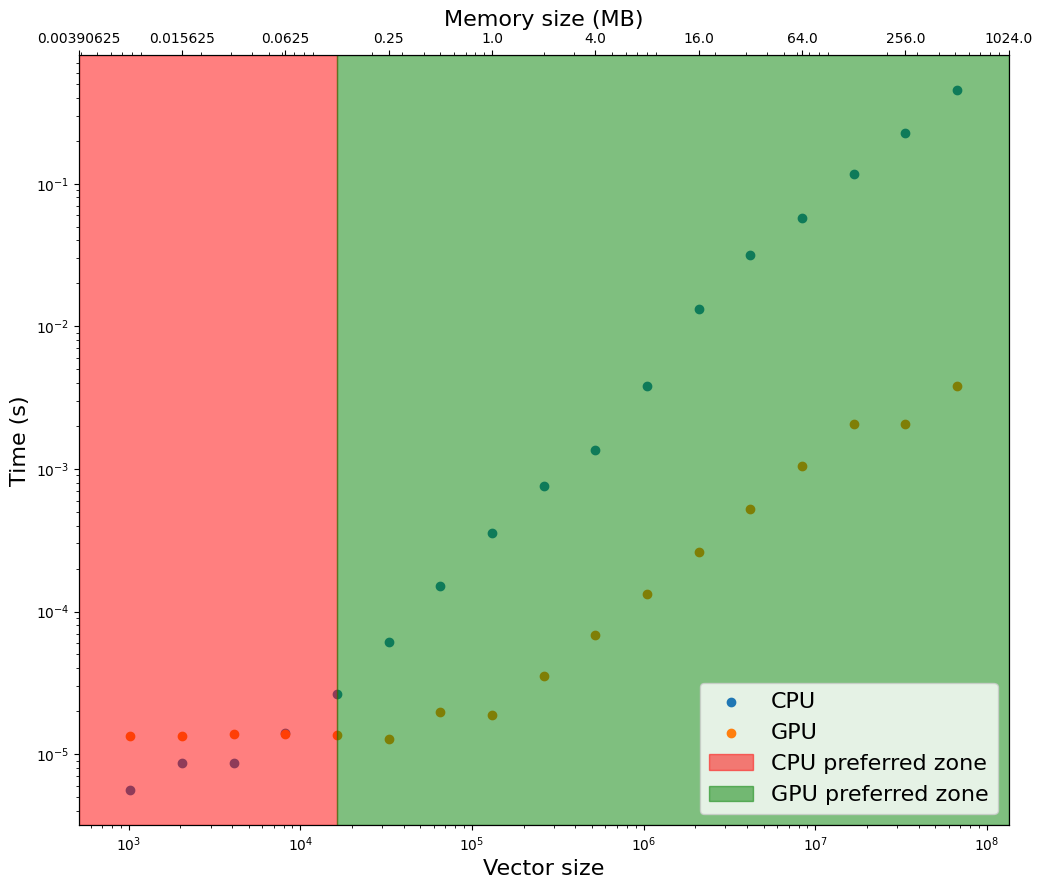

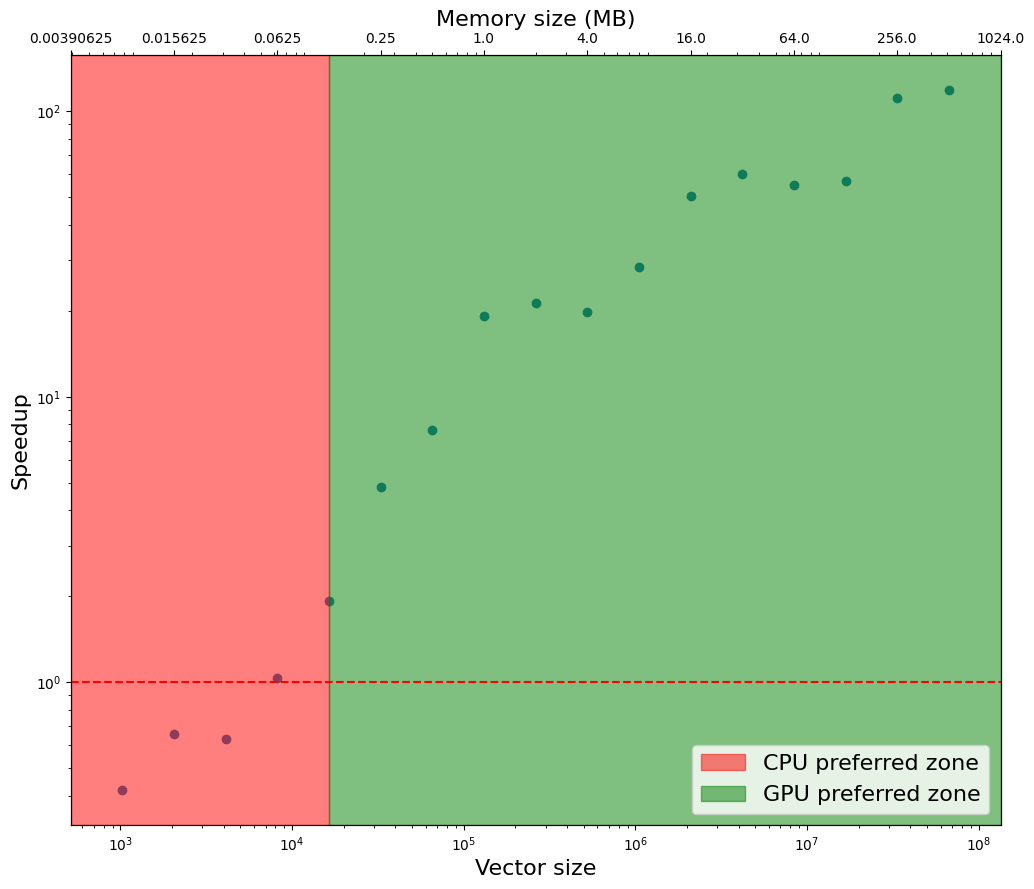

In [ ]:
#Plot the time taken for each vector addition on the CPU and GPU

plt.figure(figsize=(12, 10))
plt.scatter(n, cpu_time, label='CPU')
plt.scatter(n, gpu_time, label='GPU')
plt.xlabel('Vector size', fontsize=16)
plt.ylabel('Time (s)', fontsize=16)
plt.axvspan(2**9, 2**14, alpha=0.5, color='red', label='CPU preferred zone')
plt.axvspan(2**14, 2**27, alpha=0.5, color='green', label='GPU preferred zone')
plt.xlim(2**9, 2**27)
plt.legend(fontsize=16)
plt.xscale('log')
plt.yscale('log')

n2 = [2**i for i in range(9, 28)]
n_MB = [i*8/1024**2 for i in n2]
ax2 = plt.gca().twiny()
ax2.set_xscale('log')
ax2.set_xticks(n_MB[::2])
ax2.set_xticklabels(n_MB[::2])
ax2.set_xlabel('Memory size (MB)', fontsize=16)

#Plot the speedup of the GPU over the CPU
plt.figure(figsize=(12, 10))
plt.scatter(n, np.array(cpu_time)/np.array(gpu_time))
plt.xlabel('Vector size', fontsize=16)
plt.ylabel('Speedup', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.axhline(y=1, color='r', linestyle='--')
plt.axvspan(2**9, 2**14, alpha=0.5, color='red', label='CPU preferred zone')
plt.axvspan(2**14, 2**27, alpha=0.5, color='green', label='GPU preferred zone')
plt.xlim(2**9, 2**27)
plt.legend(fontsize=16)

ax2 = plt.gca().twiny()
ax2.set_xscale('log')
ax2.set_xticks(n_MB[::2])
ax2.set_xticklabels(n_MB[::2])
ax2.set_xlabel('Memory size (MB)', fontsize=16)

plt.show()

# Sin embargo si intentamos usar @cp.fuse() en nuestro código ...

NotImplementedError: ignored

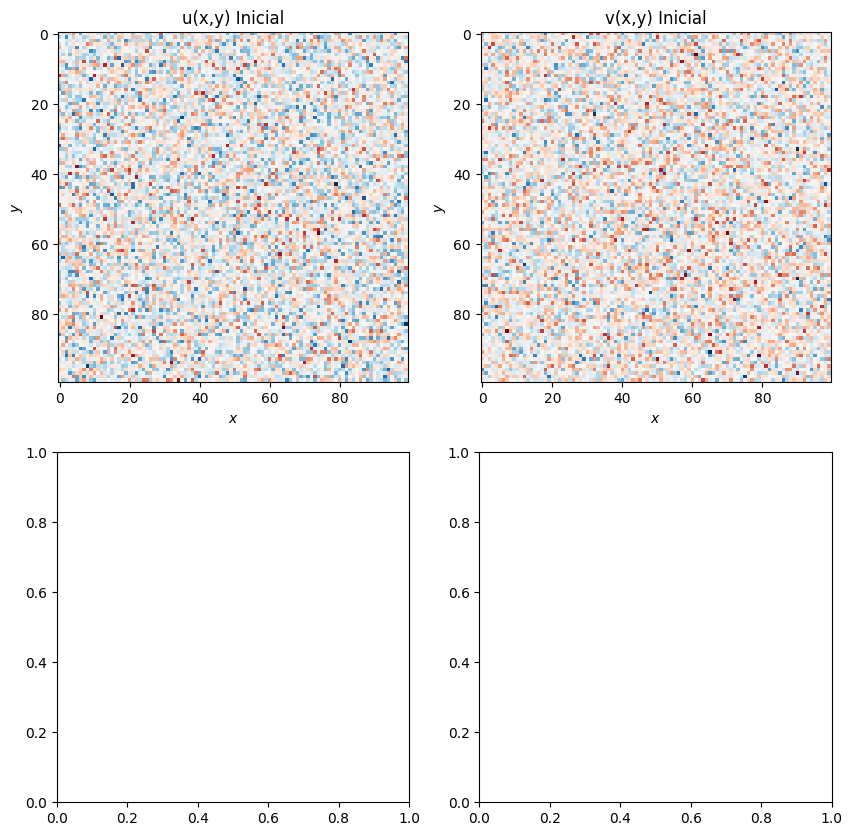

In [ ]:
import cupy as cp
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

start = time.time()
# Parámetros
Du, Dv = 1.0, 100
a, b = 0.005, 10
dx = 1.0  # Discretización espacial
dt = 0.001  # Paso del tiempo
L = 100  # longitud del dominio
T = 100  # tiempo total

Nx = int(L/dx)  # número de puntos en el espacio
Nt = int(T/dt)  # número de puntos en el tiempo

# Inicializa u y v con CuPy arrays
u = cp.random.normal(scale=0.1, size=(Nx, Nx))
v = cp.random.normal(scale=0.1, size=(Nx, Nx))

# Definimos g1 y g2
def g1(u, v):
    return u - u**3 - v + a

def g2(u, v):
    return b*(u - v)

# Función Laplaciano 2D centrado usando condiciones periódicas
def laplaciano2D(Z):
    Zarriba = cp.roll(Z, 1, axis=0)
    Zizquierda = cp.roll(Z, 1, axis=1)
    Zabajo = cp.roll(Z, -1, axis=0)
    Zderecha = cp.roll(Z, -1, axis=1)
    return (Zarriba + Zizquierda + Zabajo + Zderecha - 4*Z) / dx**2

# Preparar la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

@cp.fuse()
def update(u, v):
    laplaciano_u = laplaciano2D(u)
    laplaciano_v = laplaciano2D(v)
    u_new = u + dt * (Du * laplaciano_u + g1(u, v))
    v_new = v + dt * (Dv * laplaciano_v + g2(u, v))
    return u_new, v_new

# Configuración inicial u
axs[0, 0].imshow(u.get(), cmap='RdBu', interpolation='nearest')
axs[0, 0].set_title('u(x,y) Inicial')
axs[0, 0].set_xlabel("$x$")
axs[0, 0].set_ylabel("$y$")

# Configuración inicial v
axs[0, 1].imshow(v.get(), cmap='RdBu', interpolation='nearest')
axs[0, 1].set_title('v(x,y) Inicial')
axs[0, 1].set_xlabel("$x$")
axs[0, 1].set_ylabel("$y$")

# Calcular configuración final
for _ in range(Nt):
    u, v = update(u, v)

# Configuración final u
axs[1, 0].imshow(u.get(), cmap='RdBu', interpolation='nearest')
axs[1, 0].set_title('u(x,y) Final')
axs[1, 0].set_xlabel("$x$")
axs[1, 0].set_ylabel("$y$")

# Configuración final v
axs[1, 1].imshow(v.get(), cmap='RdBu', interpolation='nearest')
axs[1, 1].set_title('v(x,y) Final')
axs[1, 1].set_xlabel("$x$")
axs[1, 1].set_ylabel("$y$")

plt.tight_layout()
plt.show()

end = time.time()
print("\n Tiempo de corrida en segundos: ", end - start)

## Cuando los núcleos de cálculo de CuPy no están implementados debemos programar algo a más bajo nivel con la función cp.ElementwiseKernel()

La mayoría de las veces, vamos a necesitar hacer algo que no es posible hacer con los núcleos que proporciona CuPy. CuPy proporciona varias formas de escribir nuestros propios núcleos. Ya hemos visto que podemos usar el decorador `@cp.fuse()` para fusionar operaciones en un único núcleo nuevo basado en los núcleos preconstruidos que proporciona CuPy. Pero, ¿y si queremos hacer algo que no es posible hacer con los núcleos precompilados?

Una forma de hacer esto es usar la función `cp.ElementwiseKernel()`. Esta función nos permite escribir nuestros propios núcleos en un nivel más bajo. A continuación, puede ver un ejemplo de cómo usar esta función para escribir un núcleo que realiza la operación que hemos estado usando hasta ahora.

In [ ]:
f_gpu = cp.ElementwiseKernel(
    'float64 a, float64 b, float64 c', 'float64 d',
    'd = a*b + 2*c',
    'f_gpu')

n = 2**10
a = cp.random.rand(n)
b = cp.random.rand(n)
c = cp.random.rand(n)
#Compile the function on the GPU, overhead of the first call
f_gpu(a, b, c)

array([1.62926466, 0.59160423, 1.2861678 , ..., 0.80249183, 2.20724019,
       2.19844518])

La función `cp.ElementwiseKernel()` toma 3 argumentos:

  - `in_params`: Una cadena con los parámetros de entrada. En este caso, tenemos 3 parámetros de entrada: `a`, `b` y `c`. Debemos especificar el tipo de cada parámetro. En este caso, usamos `float64` para todos ellos.
  - `out_params`: Una cadena con los parámetros de salida. En este caso, tenemos 1 parámetro de salida: `d`. Debe especificar el tipo del parámetro de salida. En este caso, usamos `float64`.
  - `operación`: Una cadena con la operación a realizar. En este caso, tenemos la operación `a*b + c`.
  - `name`: Una cadena con el nombre del kernel. Esto es opcional.

  En este caso, en realidad no es necesario hacer un kernel de elementos a mano. El decorador `@cp.fuse()` lo hará por nosotros. Pero, esto es solo un ejemplo de cómo hacerlo. Más adelante veremos ejemplos más complejos en los que **necesitaremos** hacerlo a mano.

In [ ]:
#Vector size
n = 2**25

#Create random NumPy arrays of size n
a = np.random.rand(n)
b = np.random.rand(n)
c = np.random.rand(n)

#Create random CuPy arrays of size n
a_gpu = cp.random.rand(n)
b_gpu = cp.random.rand(n)
c_gpu = cp.random.rand(n)

#Perform the vector addition on the CPU
%timeit f_cpu(a,b,c)

#Perform the vector addition on the GPU
%timeit f_gpu(a_gpu,b_gpu,c_gpu)

225 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.13 ms ± 2.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Comparación de rendimiento de FFT

Ahora hagamos un cálculo más complejo. Compararemos el rendimiento de la operación FFT en NumPy y CuPy para ver cuánto podemos acelerar esta operación.

In [ ]:
#fft on numpy
n = 2**25
a = np.random.rand(n)
%timeit np.fft.fft(a)

#fft on cupy
n = 2**25
a = cp.random.rand(n)
%timeit cp.fft.fft(a)

2.66 s ± 149 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
83.6 µs ± 42.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


En este caso, obtenemos una aceleración de **~36x**. Por lo general, las operaciones complejas son las que nos dan las mayores aceleraciones.

# Tarea:

Mejorar el código de Reacción-Difusión utilizando la función cp.ElementwiseKernel()

### Referencias

- [Basics of CuPy](https://docs.cupy.dev/en/stable/user_guide/basic.html)
- [CUDA C++ Programming Guide](https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html)